In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df['Ship Mode'].nunique()

4

In [8]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [9]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [11]:
df['City'].nunique()

531

In [12]:
df['State'].nunique()

49

In [13]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [14]:
df['Category'].nunique()

3

In [15]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
df['Sub-Category'].nunique()

17

In [18]:
#Data Cleaning
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
#Next step of Data Cleaning is that we try to remove redundant columns. The columns that don't give us much information
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [20]:
df['Discount'].mean()

0.15620272163298934

In [21]:
#2
#From above correlation we infer that Postal Code doesn't seem to correlate strongly to any feature so we will remove it
#We also remove Country column since only 1 country USA is involved
#City has 531 unique values so we go ahead and also drop this feature
#Discount has an average of only 0.15 dollars over almost 10000 entries and also doesn't seem to correlate much to any numeric
#feature so we also drop it
df.drop(['Postal Code','Country','Discount','City'],axis=1,inplace=True)

In [22]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,2.5164


In [89]:
#3 Relationship Analysis

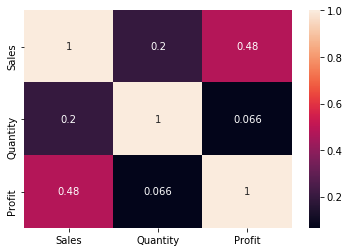

In [24]:
corelation=df.corr()
sns.heatmap(corelation,annot=True)

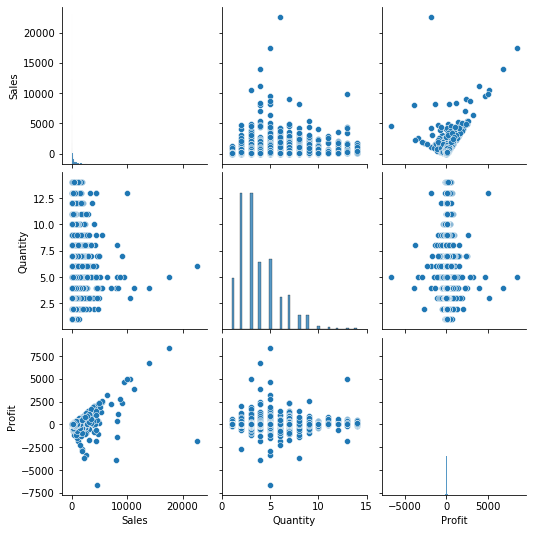

In [25]:
sns.pairplot(df)

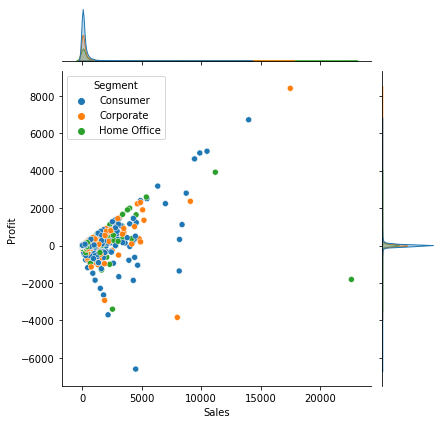

In [26]:
sns.jointplot(x='Sales', y='Profit', data=df, hue='Segment')
#doesn;t give that much defining information

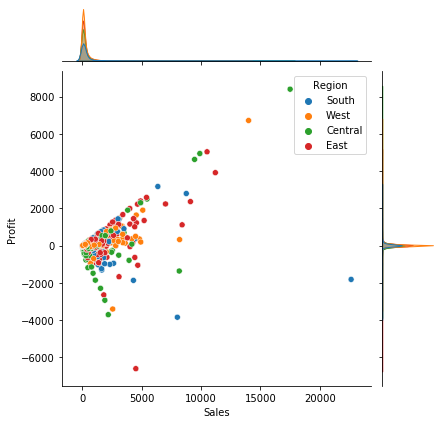

In [27]:
sns.jointplot(x='Sales', y='Profit', data=df, hue='Region')

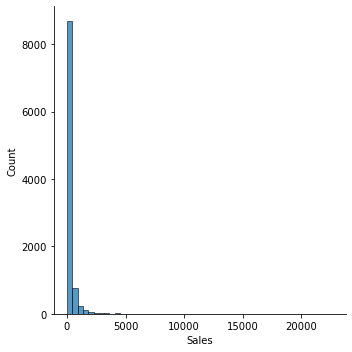

In [41]:
sns.displot(df['Sales'],bins=50)

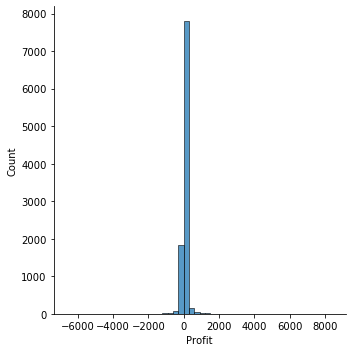

In [40]:
sns.displot(df['Profit'], bins=50)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


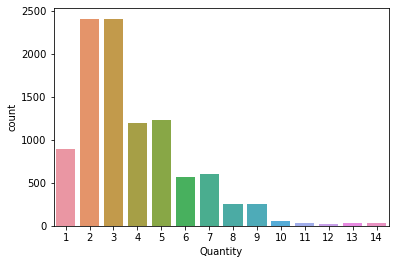

In [43]:
sns.countplot(df['Quantity'])

In [44]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,2.5164


In [45]:
df.groupby('Segment').sum()

,Sales,Quantity,Profit
Segment,,,
Consumer,1.161401e+06,19521,134119.2092
Corporate,7.061464e+05,11608,91979.1340
Home Office,4.296531e+05,6744,60298.6785


In [46]:
df.groupby('Ship Mode').sum()

,Sales,Quantity,Profit
Ship Mode,,,
First Class,3.514284e+05,5693,48969.8399
Same Day,1.283631e+05,1960,15891.7589
Second Class,4.591936e+05,7423,57446.6354
Standard Class,1.358216e+06,22797,164088.7875


In [47]:
df.groupby('Category').sum()    #add a new column to it (profit to sales ratio)

,Sales,Quantity,Profit
Category,,,
Furniture,741999.7953,8028,18451.2728
Office Supplies,719047.0320,22906,122490.8008
Technology,836154.0330,6939,145454.9481


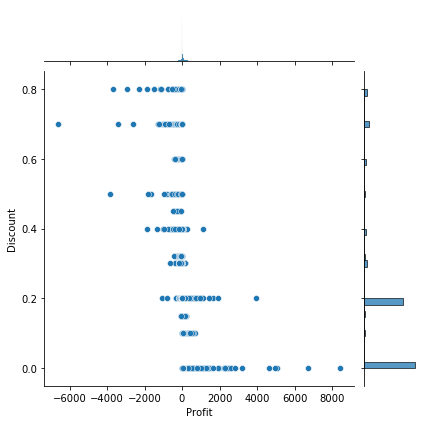

In [28]:
sns.jointplot(x='Profit', y='Discount', data=df)

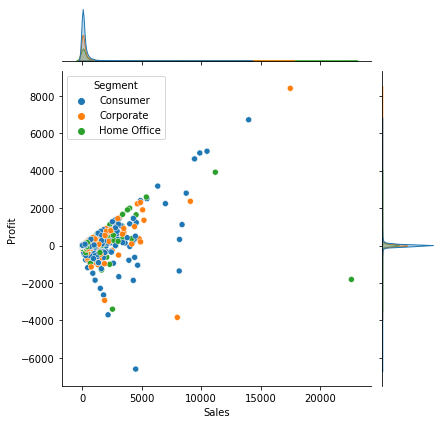

In [34]:
sns.jointplot(x='Sales', y='Profit', data=df, hue='Segment')

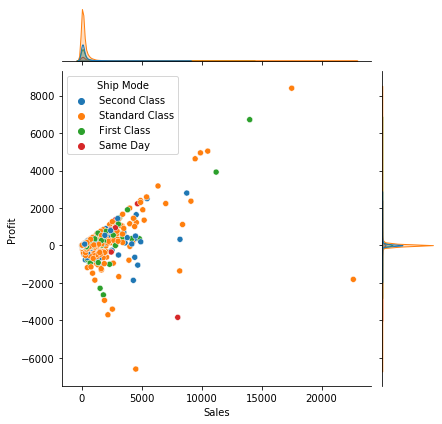

In [35]:
sns.jointplot(x='Sales', y='Profit', data=df, hue='Ship Mode')

In [36]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [37]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


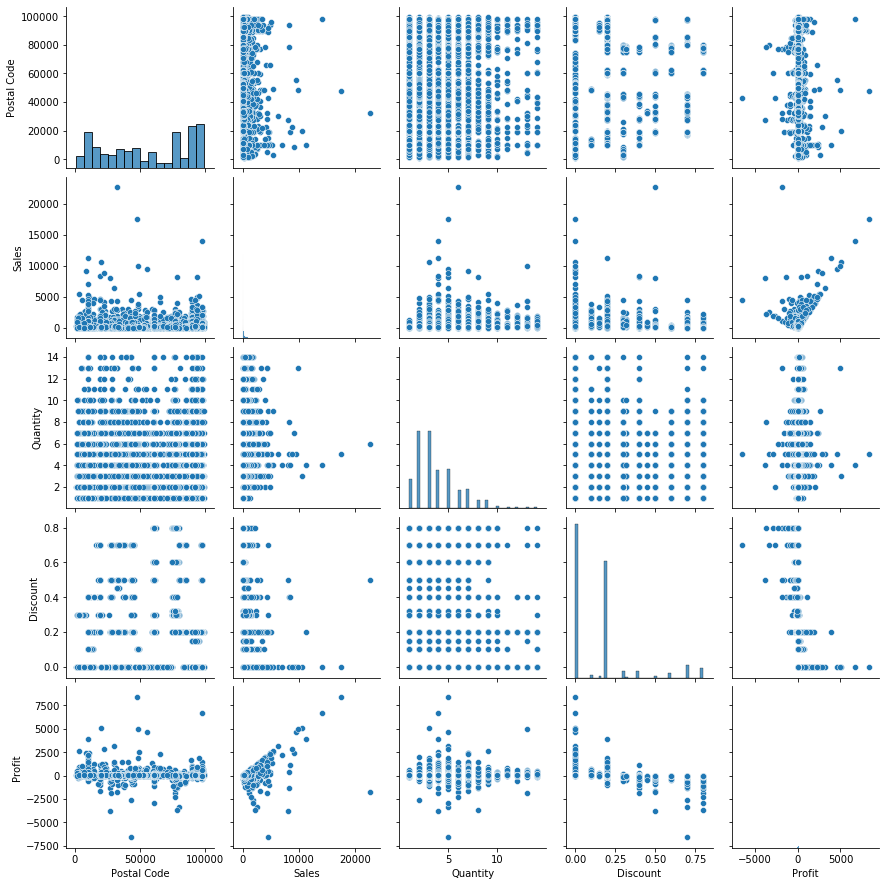

In [38]:
sns.pairplot(df)

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


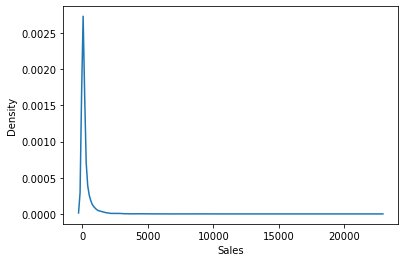

In [40]:
sns.kdeplot(df['Sales'])

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


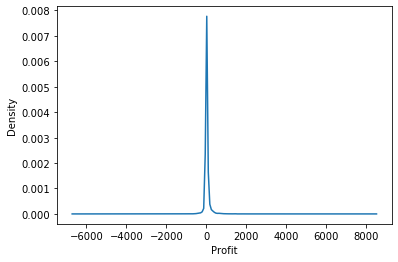

In [41]:
sns.kdeplot(df['Profit'])

In [42]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


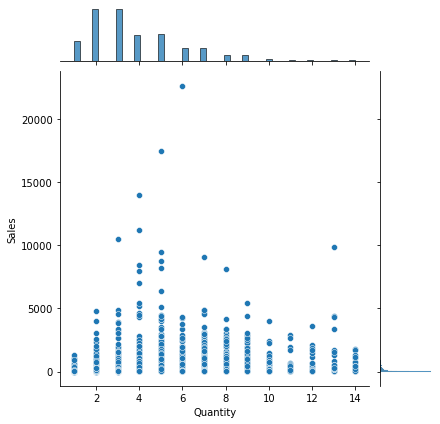

In [43]:
sns.jointplot(x='Quantity', y='Sales',data=df)

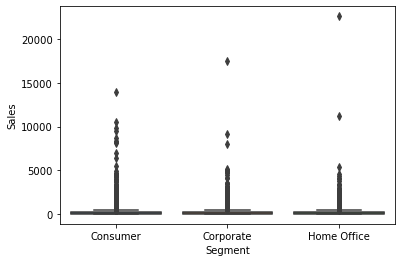

In [44]:
sns.boxplot(x='Segment',y='Sales',data=df)

In [45]:
df['Sales'].max()

22638.48

In [46]:
df['Profit'].max()

8399.976

In [47]:
df['Sales'].min()

0.444

In [48]:
df['Profit'].min()

-6599.978

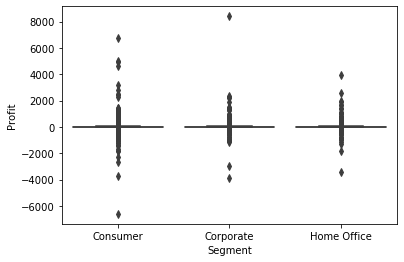

In [49]:
sns.boxplot(x='Segment',y='Profit',data=df)

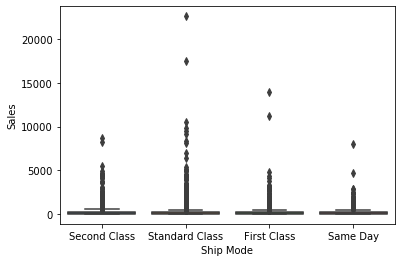

In [50]:
sns.boxplot(x='Ship Mode',y='Sales',data=df)

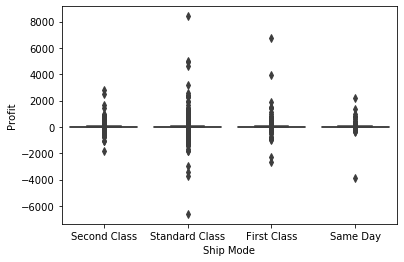

In [51]:
sns.boxplot(x='Ship Mode',y='Profit',data=df)

In [52]:
hm=df.corr()

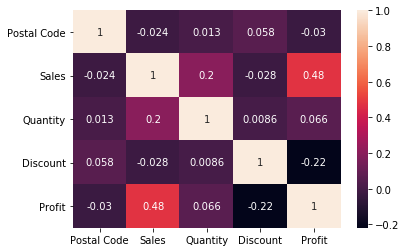

In [54]:
sns.heatmap(hm, annot=True)

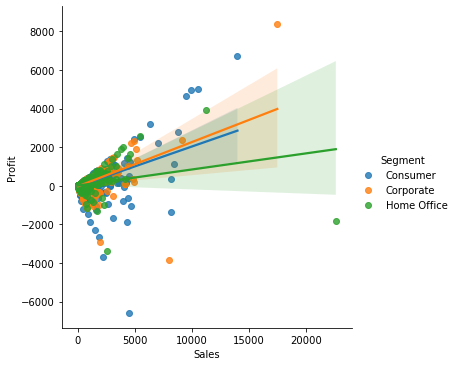

In [56]:
sns.lmplot(x='Sales',y='Profit',data=df,hue='Segment')

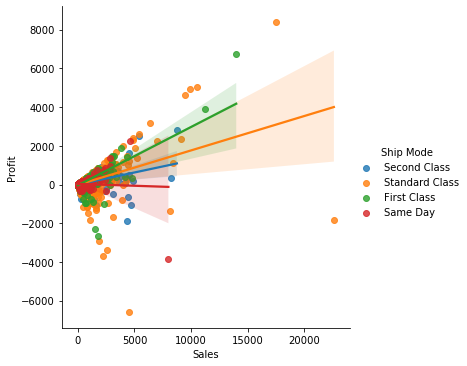

In [57]:
sns.lmplot(x='Sales',y='Profit',data=df,hue='Ship Mode')

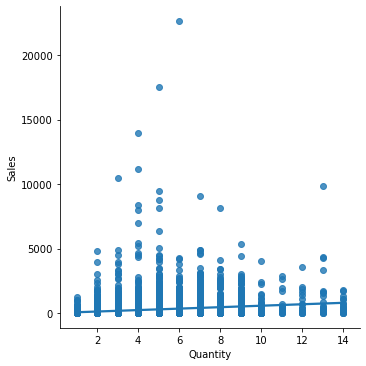

In [76]:
sns.lmplot(x='Quantity',y='Sales',data=df)

In [58]:
df.groupby('Segment')['Sales'].mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

In [59]:
df.groupby('Ship Mode')['Sales'].mean()

Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64

In [60]:
df.groupby('Segment')['Profit'].mean()

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

In [61]:
df.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

In [62]:
df.groupby('Region')['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [63]:
df.groupby('Region')['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

In [64]:
df.groupby('Category')['Sales'].mean()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

In [66]:
df.groupby('Category')['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

In [72]:
df.groupby('Sub-Category')['Sales'].mean().sort_values(ascending=[False]).head(5)

Sub-Category
Copiers      2198.941618
Machines     1645.553313
Tables        648.794771
Chairs        532.332420
Bookcases     503.859633
Name: Sales, dtype: float64

In [75]:
df.groupby('Sub-Category')['Profit'].mean().sort_values(ascending=[False]).head(5)

Sub-Category
Copiers        817.909190
Accessories     54.111788
Phones          50.073938
Chairs          43.095894
Appliances      38.922758
Name: Profit, dtype: float64

In [82]:
df.groupby('State')['Sales'].mean().sort_values(ascending=[False]).head(5)

State
Wyoming         1603.136000
Vermont          811.760909
Nevada           428.951333
Rhode Island     404.070643
Montana          372.623467
Name: Sales, dtype: float64

In [83]:
df.groupby('State')['Profit'].mean().sort_values(ascending=[False]).head(5)

State
Vermont         204.088936
Rhode Island    130.100523
Indiana         123.375411
Montana         122.221900
Minnesota       121.608847
Name: Profit, dtype: float64

In [84]:
df.groupby('City')['Sales'].mean().sort_values(ascending=[False]).head(5)

City
Jamestown       2354.395000
Cheyenne        1603.136000
Bellingham      1263.413333
Independence    1208.685000
Burbank         1082.386000
Name: Sales, dtype: float64

In [85]:
df.groupby('City')['Profit'].mean().sort_values(ascending=[False]).head(5)

City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Minneapolis     296.721070
Appleton        277.383150
Name: Profit, dtype: float64

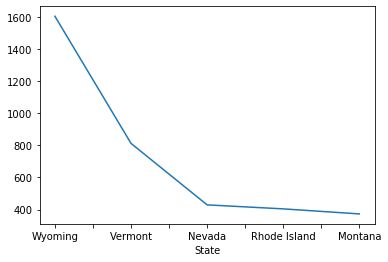

In [28]:
df.groupby('State')['Sales'].mean().sort_values(ascending=[False]).head(5).plot()